In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [2]:
#import marketing campaign dataset
df = pd.read_csv("C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8550_Data Preparation Methods\\Week 8\\marketing_campaign_adj.csv")
 #remove response variables
df.drop(['Response','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'], 
        axis = 1, inplace=True)
df.dtypes

Education              object
Marital_Status         object
Income                  int64
Kidhome                 int64
Teenhome                int64
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
Complain                int64
Year_Old                int64
Year_Customer           int64
dtype: object

In [3]:
#Encode values for Education and Marital_Status
df["Education"].replace({"Graduation" : "0", "PhD" : "1", "Master" : "2", "Basic" : "3", "2n Cycle" : "4"}, 
                       inplace=True)
df["Marital_Status"].replace({"Single":"0", "Alone":"0", "Together":"1", "Married":"1", "Divorced":"2", 
                             "Widow":"3", "Absurd":"4", "YOLO":"4"}, inplace=True)

In [4]:
#change data type for Education and Marital_Status as 'int64'

df.Education = df.Education.astype('int64')
df.Marital_Status = df.Marital_Status.astype('int64')

df.dtypes

Education              int64
Marital_Status         int64
Income                 int64
Kidhome                int64
Teenhome               int64
Recency                int64
MntWines               int64
MntFruits              int64
MntMeatProducts        int64
MntFishProducts        int64
MntSweetProducts       int64
MntGoldProds           int64
NumDealsPurchases      int64
NumWebPurchases        int64
NumCatalogPurchases    int64
NumStorePurchases      int64
NumWebVisitsMonth      int64
Complain               int64
Year_Old               int64
Year_Customer          int64
dtype: object

In [5]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
#Explained variation per principal component: [9.99817646e-01 1.27809020e-04]
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))
#Cumulative variance explained by 2 principal components: 99.99%
df_scale = pca_2_result

Explained variation per principal component: [9.99817647e-01 1.27808990e-04]
Cumulative variance explained by 2 principal components: 99.99%


In [6]:
df_scale = pd.DataFrame(df_scale)

In [7]:
#add column names
df_scale.columns = ["var1", "var2"]
print(df_scale)

              var1        var2
0      6454.880145 -398.947230
1     -5346.327527  287.930370
2     19925.505677   73.354336
3    -25043.429177  107.598475
4      6604.037936  198.252455
...            ...         ...
2235   9538.464797 -312.156397
2236  12326.018863   68.697247
2237   5298.087321 -531.946118
2238  17558.031104   20.550280
2239   1179.233451  257.542126

[2240 rows x 2 columns]


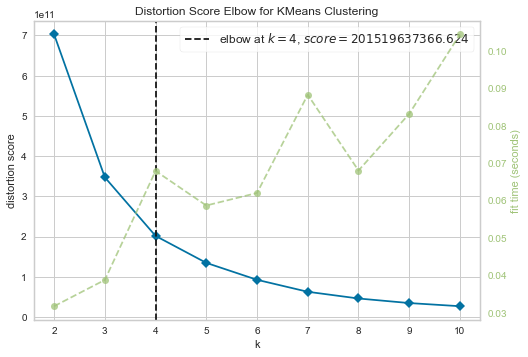

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, K=(1,5)).fit(df_scale)
visualizer.show()
#Results show optimal cluster is 4

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_scale)


In [10]:
#labels_ : gives predicted class labels (cluster) for each data point
kmeans.labels_  # same as kmeans.predict(df)
klables = pd.DataFrame(kmeans.labels_)
klables.columns = ["Cluster"]
klables

,Cluster
0,0
1,0
2,3
3,1
4,0
...,...
2235,0
2236,0
2237,0
2238,3


In [11]:
#inertia_ : gives within-cluster sum of squares. 
#This is a total of the within-cluster sum of squares for all clusters.
kmeans.inertia_

201510441277.87555

In [12]:
#n_iter_ : number of iterations that k-means algorithm runs to get 
#a minimum within-cluster sum of squares
kmeans.n_iter_

4

In [13]:
#cluster_centers_ : Location of the centroids on each cluster. 
kmeans.cluster_centers_

array([[ 7.04304120e+01,  5.04652136e+01],
       [-2.47367563e+04,  8.41604377e+01],
       [ 6.14949895e+05,  5.79345459e+03],
       [ 2.50856720e+04, -1.55195327e+02]])

In [14]:
#Get each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 805, 3: 698, 1: 736, 2: 1})

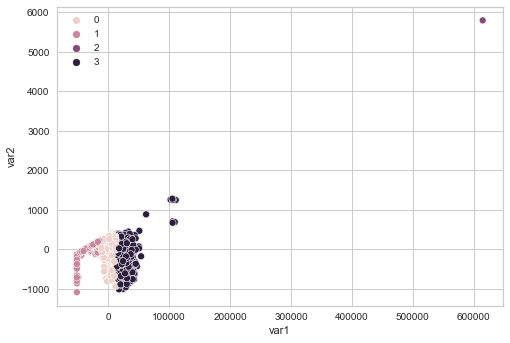

In [15]:
#Visualization of K-means Clustering
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df_scale, x="var1", y="var2", hue=kmeans.labels_)
plt.show()

In [16]:
#Combine Cluster Results to Dataset
clus_res = pd.concat([df,klables], axis=1, ignore_index=False)
clus_res

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Year_Old,Year_Customer,Cluster
0,0,0,58138,0,0,58,635,88,546,172,...,88,3,8,10,4,7,0,57,2,0
1,0,0,46344,1,1,38,11,1,6,2,...,6,2,1,1,2,5,0,60,0,0
2,0,1,71613,0,0,26,426,49,127,111,...,42,1,8,2,10,4,0,49,1,3
3,0,1,26646,1,0,26,11,4,20,10,...,5,2,2,0,4,6,0,30,0,1
4,1,1,58293,1,0,94,173,43,118,46,...,15,5,5,3,6,5,0,33,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,61223,0,1,46,709,43,182,42,...,247,2,9,3,4,5,0,47,1,0
2236,1,1,64014,2,1,56,406,0,30,0,...,8,7,8,2,5,7,0,68,0,0
2237,0,2,56981,0,0,91,908,48,217,32,...,24,1,2,3,13,6,0,33,0,0
2238,2,1,69245,0,1,8,428,30,214,80,...,61,2,6,5,10,3,0,58,0,3


In [17]:
df_response = pd.read_csv("C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8550_Data Preparation Methods\\Week 8\
\marketing_campaign_adj.csv")
list(df_response)

['Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Year_Old',
 'Year_Customer',
 'Response']

In [30]:
#Combine Response variables to Dataset
comb_data = pd.concat([clus_res, df_response['Response']], axis=1, ignore_index=False)
list(comb_data)

['Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Complain',
 'Year_Old',
 'Year_Customer',
 'Cluster',
 'Response']

In [19]:
comb_data.to_csv(r'C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8550_Data Preparation Methods\\Week 8\\comb_data.csv', index = False)

In [35]:
#Filter dataset for cluster 3
cluster_3 = comb_data[comb_data['Cluster']==3]
print(cluster_3.head())


    Education  Marital_Status  Income  Kidhome  Teenhome  Recency  MntWines  \
2           0               1   71613        0         0       26       426   
15          1               0   82800        0         0       23      1006   
18          2               1   76995        0         1       91      1012   
23          1               1   65324        0         1        0       384   
29          1               1   84618        0         0       96       684   

    MntFruits  MntMeatProducts  MntFishProducts  ...  NumDealsPurchases  \
2          49              127              111  ...                  1   
15         22              115               59  ...                  1   
18         80              498                0  ...                  2   
23          0              102               21  ...                  3   
29        100              801               21  ...                  1   

    NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
2          

In [41]:
cluster3_descriptive = cluster_3.describe()

cluster3_descriptive.to_csv(r'C:\\Users\\jason\\OneDrive\\Desktop\\NCU\\8550_Data Preparation Methods\\Week 8\\cluster3_descriptive.csv', index = True)